<a href="https://colab.research.google.com/github/sarthakkaushik/Cdiscount-Image-Classification/blob/main/Reading_Tfrecord_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Jan 13 17:59:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Code to mount google drive in case you are loading the data from your google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
import os 
data_path = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount'
os.chdir(data_path)
print(os.getcwd())

/gdrive/MyDrive/UOH Assignment Dataset/cdiscount


In [102]:
import os, sys, math, io
import numpy as np
import pandas as pd
import multiprocessing as mp
import bson
import struct
import datetime

%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

from collections import defaultdict
from tqdm import *
from tensorflow.python.data.experimental import AUTOTUNE
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../cdiscount"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

categories.csv
category_names.csv
CheckPoints
file.h5
helper.py
helper.py.1
helper.py.2
helper.py.3
helper.py.4
helper.py.5
helper.py.6
helper.py.7
__pycache__
sample_submission.csv
Tensorboard
test.bson
train.bson
train_example.bson
train_images.csv
training_logs
train_offsets.csv
train_TFrecords.tfrecords
val_images.csv



In [5]:
#Reading Tfrecord file

data_dir = "../cdiscount/"

train_tfrecord_path = os.path.join(data_dir, "train_TFrecords.tfrecords")


raw_dataset = tf.data.TFRecordDataset(train_tfrecord_path)



In [ ]:
for raw_record in raw_dataset.take(10):
  print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\n\xfa6\n\x18\n\x0bcategory_id\x12\t\x1a\x07\n\x05\x9d\xe7\xeb\xdc\x03\n\x0f\n\x05width\x12\x06\x1a\x04\n\x02\xb4\x01\n\x956\n\x07img_raw\x12\x896\n\x866\n\x836\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXY

In [ ]:
for raw_record in raw_dataset.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)

features {
  feature {
    key: "category_id"
    value {
      int64_list {
        value: 1000010653
      }
    }
  }
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 180
      }
    }
  }
  feature {
    key: "img_raw"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\000\264\000\264\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\00

In [6]:
# Create a dictionary describing the features.
image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {depth: (), height: (), image_raw: (), label: (), width: ()}, types: {depth: tf.int64, height: tf.int64, image_raw: tf.string, label: tf.int64, width: tf.int64}>

In [94]:
from PIL import Image
def parse_tfr_element(element,img_shape=180):
  #use the same structure as above; it's kinda an outline of the structure we now want to create
  data = {
      'height': tf.io.FixedLenFeature([], tf.int64),
      'width':tf.io.FixedLenFeature([], tf.int64),
      'depth':tf.io.FixedLenFeature([], tf.int64),
      'category_id':tf.io.FixedLenFeature([], tf.int64),      
      'product_id':tf.io.FixedLenFeature([], tf.int64),
      'img_raw' : tf.io.FixedLenFeature([], tf.string)
          }    
  content = tf.io.parse_single_example(element, data)  
  height = content['height']
  width = content['width']
  depth = content['depth']
  label = content['category_id']
  product_id = content['product_id']
  img_raw = content['img_raw']
  
  
  #get our 'feature'-- our image -- and reshape it appropriately
  # image = tf.io.decode_raw(img_raw,tf.uint8,fixed_length=97200)
  image = tf.io.decode_raw(img_raw,tf.uint8)
  image=tf.reshape(image, [180, 180, 3])
  # image = tf.reshape(image, shape=[height,width,depth])
  return tf.cast(image, tf.float32), label


To create a dataset out of the parse elements, we simply leverage the tf.data API. We create a TFRecordDataset by pointing it to the TFRecord file on our disk and then apply our previous parsing function to every extracted Example. This returns a dataset:

In [40]:
# def get_dataset_small(filename):
#   #create the dataset
#   dataset = tf.data.TFRecordDataset(train_tfrecord_path, num_parallel_reads=tf.data.AUTOTUNE)   

#   #pass every single feature through our mapping function
#   dataset = dataset.map(parse_tfr_element, num_parallel_calls=tf.data.AUTOTUNE)
#   # Shuffle train_data and turn it into batches and prefetch it (load it faster)
#   dataset = dataset.shuffle(buffer_size=1000).batch(batch_size=128).prefetch(buffer_size=tf.data.AUTOTUNE)
    
#   return dataset

In [95]:
#create the dataset
dataset = tf.data.TFRecordDataset(train_tfrecord_path, num_parallel_reads=tf.data.AUTOTUNE)
# = tf.data.TFRecordDataset(train_tfrecord_path, compression_type = 'ZLIB')

#pass every single feature through our mapping function
dataset = dataset.map(parse_tfr_element, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
dataset = dataset.shuffle(buffer_size=1000).batch(batch_size=128).prefetch(buffer_size=tf.data.AUTOTUNE)



#   # Map prepreprocessing function to test data
# test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# # Turn test data into batches (don't need to shuffle)
# test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)
    


In [96]:
dataset

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int64)>

We can explore the content of our dataset by taking a single data point:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'tuple'>
****************************************************************************************************
(<tf.Tensor: shape=(128, 180, 180, 3), dtype=float32, numpy=
array([[[[255., 216., 255.],
         [224.,   0.,  16.],
         [ 74.,  70.,  73.],
         ...,
         [117., 118., 119.],
         [120., 121., 122.],
         [130., 131., 132.]],

        [[133., 134., 135.],
         [136., 137., 138.],
         [146., 147., 148.],
         ...,
         [223., 140., 249.],
         [177., 134., 199.],
         [211.,  53., 237.]],

        [[ 63.,  13.,  53.],
         [ 22., 212., 180.],
         [120., 146., 233.],
         ...,
         [ 88., 106.,  78.],
         [250., 156.,  46.],
         [169., 255.,   0.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0

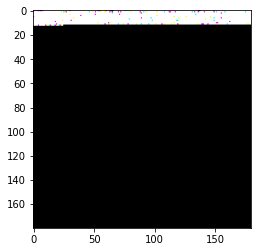

In [90]:
from PIL import Image
import io
import IPython.display as display
import matplotlib.pyplot as plt


# image_data = ... # byte values of the image
# image = Image.open(io.BytesIO(image_data))
# image.show()


for data in dataset_small.take(1):



    print(type(data))
    print("*"*100)
    print(data)
    print("*"*100)
    print(len(data[0]))
    print("*"*100)
    print(type(data[0]))
    print("*"*100)
    image_raw=data[0][50].numpy()
    # image_raw
    plt.imshow(image_raw)
    # display.display(display.Image(data=image_raw))
    # arr_ = np.squeeze(data) # you can give axis attribute if you wanna squeeze in specific dimension
    # image = Image.open(io.BytesIO(arr_))
    # image.show()

    # # plt.imshow(arr_.astype(np.uint8))
    # # plt.show()
    # print("*"*100)

    # print("Shape-",data.shape)
    # print("*"*100)
    # print(l)
    # print("*"*100)


In [ ]:
#Importing packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization,Dense, GlobalAveragePooling2D

num_classes = 5270

In [99]:
#-----------------------TRAINING------------------------------------------------#


# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/sarthakkaushik/Cdiscount-Image-Classification/main/helper.py

# Import helper functions we're going to use
from helper import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

dir_name = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount/Tensorboard'
def create_tensorboard_callback(experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Setup checkpoint path
checkpoint_path = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount/CheckPoints/EfficientNet/Efficient_Tfrecord_test.ckpt' # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)




num_classes = 5270

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (180, 180, 3)
base_model = tf.keras.applications.EfficientNetB7(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model 
inputs = layers.Input(shape=input_shape, name="input_layer", dtype=tf.float16)
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = preprocessing.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(num_classes)(x) # want one output neuron per class 
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", name="softmax_float32")(x) 
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

--2022-01-13 19:12:41--  https://raw.githubusercontent.com/sarthakkaushik/Cdiscount-Image-Classification/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10510 (10K) [text/plain]
Saving to: ‘helper.py.7’

helper.py.7         100%[===================>]  10.26K  --.-KB/s    in 0.002s  

2022-01-13 19:12:42 (4.44 MB/s) - ‘helper.py.7’ saved [10510/10510]

258088960/258076736 [==============================] - 1s 0us/step


In [105]:
# Fit the model with callbacks
history = model.fit(dataset, 
                    epochs=3,
                    validation_split=0.3,
                    # validation_steps=int(0.15 * len(dataset)),
                    # callbacks=[checkpoint_callback,create_tensorboard_callback("TranferLearning_EfficientNetB7_Tfrecord_Test")]
)

ValueError: ignored

FROM THE AUTHOR